PostgreSQL supports:
* inner join,
* left join,
* right join,
* full outer join,
* cross join,
* natural join, and
* a special kind of join called a **self-join**.

# Table Aliases

A **table alias** is a feature in SQL that allows you to assign a temporary name to a table during the execution of a query.

**SYNTAX**: `table_name AS alias_name`

**EXAMPLE**:
```postgresql
SELECT f.title
FROM film AS f
ORDER BY f.title
LIMIT 5;
```

* Typically, you use **table aliases** in a query that has a **join clause** to retrieve data from multiple related tables that share the same column name.
* If you use the same column name that comes from multiple tables in the same query without fully qualifying them, you will get an error.

To avoid this error, you can qualify the columns using the following syntax:

```postgresql
table_name.column_name          -- using tablename
table_alias.column_name         -- using iable alias
```

# INNER JOIN clause

Use `INNER JOIN` clauses to select data from two or more related tables and return rows that have matching values in all tables.

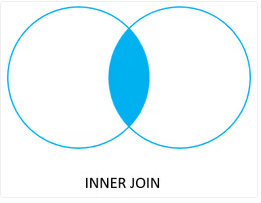

**SYNTAX**
```postgresql

SELECT column_list
FROM table1 t1
INNER JOIN table2 t2
ON t1.column_name = t2.column_name;

SELECT column_list
FROM table1 t1
INNER JOIN table2 t2
USING(column_name);     --If the columns for matching share the same name in both tables
  
```

**`INNER JOIN` to join three tables**
```postgresql
SELECT
  c.customer_id,
  c.first_name || ' ' || c.last_name customer_name,
  s.first_name || ' ' || s.last_name staff_name,
  p.amount,
  p.payment_date
FROM
  customer c
  INNER JOIN payment p USING(customer_id)
  INNER JOIN staff s USING(staff_id)
ORDER BY
  payment_date;
```

# LEFT JOIN clause

* The `LEFT JOIN` clause joins a **left table** with the **right table** and returns the rows from the **left table** that may or may not have corresponding rows in the **right table**.
* The `LEFT JOIN` can be useful for selecting rows from one table that do not have matching rows in another.
* Note that the `LEFT OUTER JOIN` is the same as `LEFT JOIN`. The `OUTER` keyword is optional.

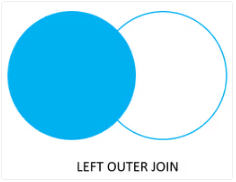

**SYNTAX**:
```postgresql
SELECT column_list
FROM table1 t1
LEFT JOIN table2 t2
ON t1.column_name = t2.column_name;

SELECT column_list
FROM table1 t1
LEFT JOIN table2 t2
USING (column_name);    --If the columns for matching share the same name in both tables
  
```

**EXAMPLE**: Join the file and inventory tables and identify the films that are not present in the inventory.
```postgresql
SELECT
  f.film_id,
  f.title,
  i.inventory_id
FROM film f
LEFT JOIN inventory i 
USING (film_id)
WHERE i.film_id IS NULL
ORDER BY f.title;
```

# RIGHT JOIN clause

* The `RIGHT JOIN` clause joins a **right table** with a **left table** and returns the rows from the** right table** that may or may not have matching rows in the **left table**.
* The `RIGHT JOIN` can be useful when you want to find rows in the right table that do not have matching rows in the left table.
* Note that the `RIGHT OUTER JOIN` is the same as `RIGHT JOIN`. The `OUTER` keyword is optional.

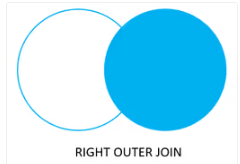

**SYNTAX**:
```postgresql
SELECT column_list
FROM table1 t1
RIGHT JOIN table2 t2
ON t1.column_name = t2.column_name;

SELECT column_list
FROM table1 t1
RIGHT JOIN table2 t2
USING (column_name);    --If the columns for matching share the same name in both tables

```

**EXAMPLE**: Join the inventory and film tables and identify the films that have no inventory.
```postgresql
SELECT
  f.film_id,
  f.title,
  i.inventory_id
FROM inventory i
RIGHT JOIN flim f
USING (film_id)
WHERE i.inventory_id  IS NULL
ORDER BY f.title;
```

# Self-Join

* A **self-join** is a regular join that joins a table to itself, using `INNER JOIN`, `LEFT JOIN`, or `RIGHT JOIN`.
* Self-joins are very useful for querying hierarchical data or comparing rows within the same table.

**EXAMPLE**:

```
employee_id | first_name |  last_name  | manager_id
-------------+------------+-------------+------------
           1 | Windy      | Hays        |       null
           2 | Ava        | Christensen |          1
           3 | Hassan     | Conner      |          1
           4 | Anna       | Reeves      |          2
           5 | Sau        | Norman      |          2
           6 | Kelsie     | Hays        |          3
           7 | Tory       | Goff        |          3
           8 | Salley     | Lester      |          3
(8 rows)
```


In this **employee** table, the **manager_id** column references the **employee_id** column.
* The **manager_id** column indicates the direct relationship, showing the manager to whom the employee reports.
* If the **manager_id** column contains `NULL`, which signifies that the respective employee does not report to anyone, essentially holding the top managerial position.

The following query uses the **self-join** to find who reports to whom:
```postgresql
SELECT
  e.first_name || ' ' || e.last_name employee,
  m.first_name || ' ' || m.last_name manager
FROM employee e
INNER JOIN employee m ON m.employee_id = e.manager_id
ORDER BY manager;
```

**OUTPUT**:
```
employee     |     manager
-----------------+-----------------
 Sau Norman      | Ava Christensen
 Anna Reeves     | Ava Christensen
 Salley Lester   | Hassan Conner
 Kelsie Hays     | Hassan Conner
 Tory Goff       | Hassan Conner
 Ava Christensen | Windy Hays
 Hassan Conner   | Windy Hays
(7 rows)
```

Notice that the top manager does not appear on the output.

To include the top manager in the result set, you use the `LEFT JOIN` instead of `INNER JOIN` clause.

# FULL OUTER JOIN clause

* The `FULL OUTER JOIN` combines data from two tables and returns all rows from both tables, including matching and non-matching rows from both sides.
* In other words, the `FULL OUTER JOIN` combines the results of both the **left join** and the **right join**.
* The `FULL OUTER JOIN` is also known as `FULL JOIN`. The `OUTER` keyword is optional.

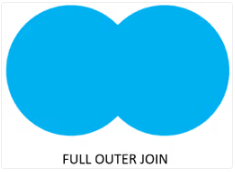

**How does the FULL OUTER JOIN work?**
* Include matching rows present in both table1 and table2.
* Include rows from **table1** that do not have a match in **table2**. For the columns from **table2** in these rows, include `NULL`s.
* Include rows from **table2** that do not have a match in **table1**. For the columns from **table1** in these rows, include `NULL`s.

**EXAMPLE**:
```postgresql
SELECT
  employee_name,
  department_name
FROM employees e
FULL OUTER JOIN departments d
ON d.department_id = e.department_id
WHERE department_name IS NULL;
```

# CROSS JOIN clause

* In PostgreSQL, a **cross-join** allows you to join two tables by combining each row from the first table with every row from the second table, resulting in a complete combination of all rows.
* In set theory, we can say that a **cross-join** produces the **cartesian product** of rows in two tables.
* Unlike other join clauses such as `LEFT JOIN`  or `INNER JOIN`, the `CROSS JOIN` clause does not have a join predicate.

**EXAMPLE**:
```postgresql
SELECT column_list
FROM table1
CROSS JOIN table2;

-- Equivalent Query to Cross Join
SELECT column_list
FROM table1, table2; 

```

# NATURAL JOIN clause

A **natural join** is a join that creates an **implicit join based on the same column names** in the joined tables.

**SYNTAX**:
```postgresql
SELECT column_list
FROM table1
NATURAL [INNER, LEFT, RIGHT] JOIN table2;
```

* A **natural join** can be an **inner** join, **left** join, or **right** join.
* If you do not specify an explicit join, PostgreSQL will use the `INNER JOIN` by default.
* The convenience of the `NATURAL JOIN` is that ***it does not require you to specify the condition*** in the join clause because it uses an implicit condition based on the equality of the common columns.

The equivalent of the `NATURAL JOIN` clause will be like this:
```postgresql
SELECT select_list
FROM table1
[INNER, LEFT, RIGHT] JOIN table2
ON table1.column_name = table2.column_name;
-- USING (column_name);
```